In [1]:
import math
import time
import numpy as np
import torch

n=10000
a=torch.ones(n)
b=torch.ones(n)
c=torch.zeros(n)
T1=time.time()
for i in range(n):
    c[i]=a[i]+b[i]
T2=time.time()
print(T2-T1)

0.08167123794555664


In [2]:
T3=time.time()
d=a+b
T4=time.time()
print(T4-T3)

0.00018835067749023438


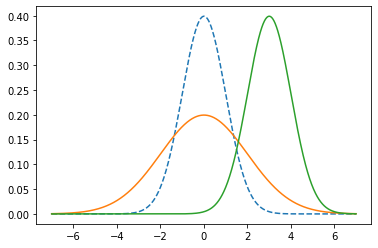

In [3]:
import matplotlib.pyplot as plt
def noraml(x,mu,sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2 * (x-mu)**2)

x=np.arange(-7,7,0.01)
y=noraml(x,0,1)
params=[(0,1),(0,2),(3,1)]
plt.plot(x,noraml(x,0,1),linestyle='--')
plt.plot(x,noraml(x,0,2))
plt.plot(x,noraml(x,3,1))


In [4]:
import random
import torch

def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.0725, -0.5431]) 
label: tensor([6.2045])


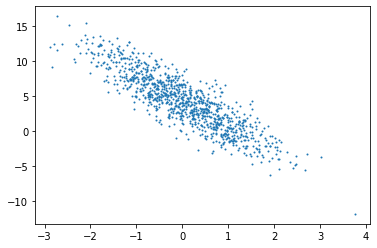

In [5]:
plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [6]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(
            indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]

batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.2680,  0.1847],
        [ 2.2352, -0.4718],
        [ 2.0412, -1.0550],
        [ 1.2527, -0.2992],
        [ 1.1935, -0.0375],
        [ 0.3922, -0.9620],
        [-0.1053,  0.8276],
        [-0.9948,  0.4342],
        [-0.0556, -1.0256],
        [-0.7462,  0.0851]]) 
 tensor([[ 4.1128],
        [10.2632],
        [11.8706],
        [ 7.7081],
        [ 6.7031],
        [ 8.2686],
        [ 1.1789],
        [ 0.7204],
        [ 7.5639],
        [ 2.4098]])


In [7]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
def linreg(X,w,b):
    return torch.matmul(X,w)+b
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

lr=0.03
batch_size=10
num_epochs=3
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

            

epoch1,loss0.034820
epoch2,loss0.000126
epoch3,loss0.000051


In [8]:
import numpy as np
from torch.utils import data

def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)
data_iter=load_array((features,labels),batch_size)
next(iter(data_iter))

[tensor([[-0.3165,  0.1856],
         [ 0.9667, -0.3124],
         [-0.0548, -0.0942],
         [-1.2002,  1.4737],
         [ 1.3885,  1.3406],
         [-0.7814,  1.1330],
         [ 0.1524, -0.6573],
         [-1.4036, -2.0103],
         [-0.1825,  1.0117],
         [-0.8430,  0.5661]]),
 tensor([[ 2.9442],
         [ 7.1863],
         [ 4.4075],
         [-3.2041],
         [ 2.4108],
         [-1.2103],
         [ 6.7276],
         [ 8.2412],
         [ 0.4018],
         [ 0.6117]])]

In [9]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

trans=transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(
                root='/kaggle/output/data',train=True,transform=trans,download=True)
mnist_test=torchvision.datasets.FashionMNIST(
                root='/kaggle/output/data',train=False,transform=trans,download=True)
len(mnist_train),len(mnist_test)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /kaggle/output/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /kaggle/output/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /kaggle/output/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /kaggle/output/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /kaggle/output/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /kaggle/output/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /kaggle/output/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /kaggle/output/data/FashionMNIST/raw



(60000, 10000)

In [10]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [11]:
def  get_fashion_mnist(labels):
    text_labe